# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



## DATA VALIDATION



In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [152]:
pet=pd.read_csv('pet_supplies_2212.csv')
print(pet)
pet.isna().sum() 
condition=pet['sales']<0
pet['sales'].isin(condition).value_counts()
len(pet['sales']) #no decimals

pet['rating']=pet['rating'].dropna()
pet['rating']=pet['rating'].fillna(0)

pet.isna().sum() 

pet['size'].value_counts()
pet['size']=pet['size'].str.capitalize()

pet['category'] = pet['category'].replace('-', 'Unknown')

pet['price'] = pet['price'].replace('unlisted', np.nan)
# Calcula la mediana de la columna 'price' sin los valores NaN
median_price = pet['price'].median()

# Llena los valores NaN en la columna 'price' con la mediana calculada
pet['price'].fillna(median_price, inplace=True)

pet['size'].value_counts()
for columns in pet.columns:
    print(pet[columns].value_counts())

pet.shape
    

    





      product_id   category animal  ...    sales rating  repeat_purchase
0              1       Food   Bird  ...  1860.62    7.0                1
1              2    Housing   Bird  ...   963.60    6.0                0
2              3       Food    Dog  ...   898.30    5.0                1
3              4   Medicine    Cat  ...   982.15    6.0                1
4              5    Housing    Cat  ...   832.63    7.0                1
...          ...        ...    ...  ...      ...    ...              ...
1495        1496       Food   Bird  ...  1203.36    5.0                0
1496        1497  Equipment    Dog  ...  1099.97    5.0                0
1497        1498       Food   Fish  ...   724.02    3.0                0
1498        1499   Medicine   Fish  ...   658.66    5.0                1
1499        1500       Food    Cat  ...   826.08    4.0                1

[1500 rows x 8 columns]
1       1
998     1
1007    1
1006    1
1005    1
       ..
498     1
497     1
496     1
495     1

(1500, 8)

The dataset contains 1500 rows and 8 columns before cleaning and validataion. I have validated all the columns against the criteria in the dataset table:

-product_id: No missing values, same as the description. No cleaning is needed.

-category: 6  values with 25 missing/wrong values(Housing,Food, Toys, Equipment, Medicine, Accessory), same as the description.Data cleaning is needed, being the '-' values replaced to 'Unknown'.

-animal: 6 nominal values(Dog, Cat,Fish, Bird), without missing values, same as the description. No cleaning is needed.

-size:3 ordinal values(Small, Medium,Large).No missing values,but where some spelling mistakes that had to be corrected,so data cleaning is needed. I´ve used the str capitalize method obtaining 754 small,492 medium and 254 large.

-price: continous values, data cleaning was needed since there were 150 values('Unlisted'), which were replaced with the overall median price

-sales: 4 categories without missing values, same as the description. No cleaning is needed.

-rating: discrete values, from 1 to 10, same as the description. There were 150 missing values which were filled with 0.

-repeat_purchase: 4 categories without missing values, same as the description. No cleaning is needed.

After the data validation, the dataset contains 1500 rows and 8 columns without missing values.

## How many products are repeat purchases?

As a result of the analysis we see that around 60% of the purchases are repeated meanwhile only 40% are not purchased again. We can appreciate how unbalanced the values are in the graph above, being the repeated purchases higher than 900, and consequently than non repeated.Therefore we could conclude that there is huge room to impove the sales of non-repeat purchases. 

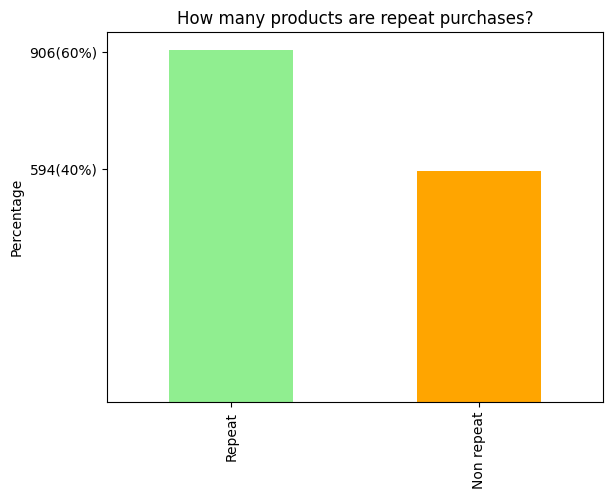

In [153]:
pet['repeat_purchase'].value_counts(normalize=True).plot(kind='bar',color=['lightgreen','orange'])
plt.title('How many products are repeat purchases?')
plt.xticks([0,1],['Repeat','Non repeat'])
plt.yticks([0.6,0.4],['906(60%)','594(40%)'])
plt.ylabel('Percentage')
plt.show()

_Write your answer here_

## SALES DISTRIBUTION ANALYSIS

We also want to visualize the sales' distribution in the dataframe. I was looking at the distribution of the sales. The majority of pet products sold is less than 1600$ (Although I don´t really know the currency, I´m going to assume they are dollars). As a result, sold products of more than 1600 dollars could be considered outliers.

Text(0.7, 0.7, 'Max: 2255.96')

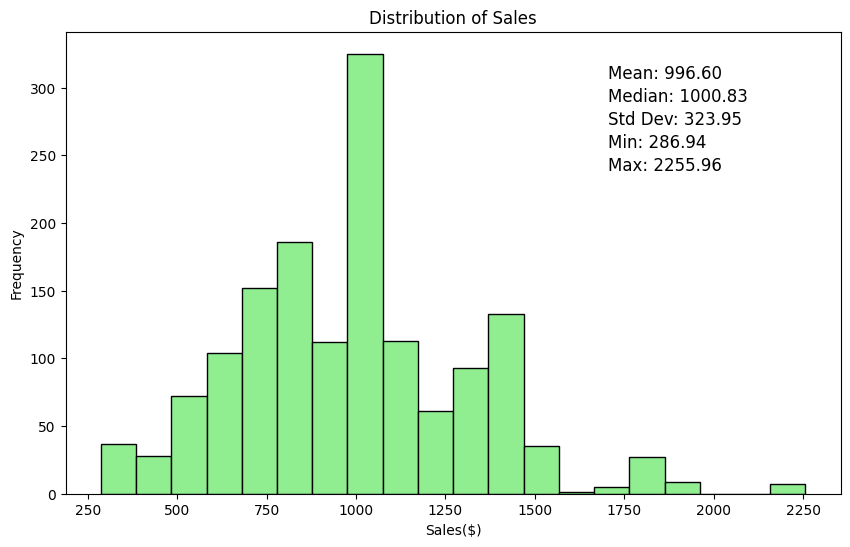

In [154]:
sales_column = pet['sales']

# Calculate summary statistics
mean_sales = sales_column.mean()
median_sales = sales_column.median()
std_sales = sales_column.std()
min_sales = sales_column.min()
max_sales = sales_column.max()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(sales_column, bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales($)')
plt.ylabel('Frequency')

# Add custom text with summary statistics
plt.text(0.7, 0.9, f"Mean: {mean_sales:.2f}", transform=plt.gca().transAxes, fontsize=12)
plt.text(0.7, 0.85, f"Median: {median_sales:.2f}", transform=plt.gca().transAxes, fontsize=12)
plt.text(0.7, 0.8, f"Std Dev: {std_sales:.2f}", transform=plt.gca().transAxes, fontsize=12)
plt.text(0.7, 0.75, f"Min: {min_sales}", transform=plt.gca().transAxes, fontsize=12)
plt.text(0.7, 0.7, f"Max: {max_sales}", transform=plt.gca().transAxes, fontsize=12)

We can also visualize our sales data in a KDE plot

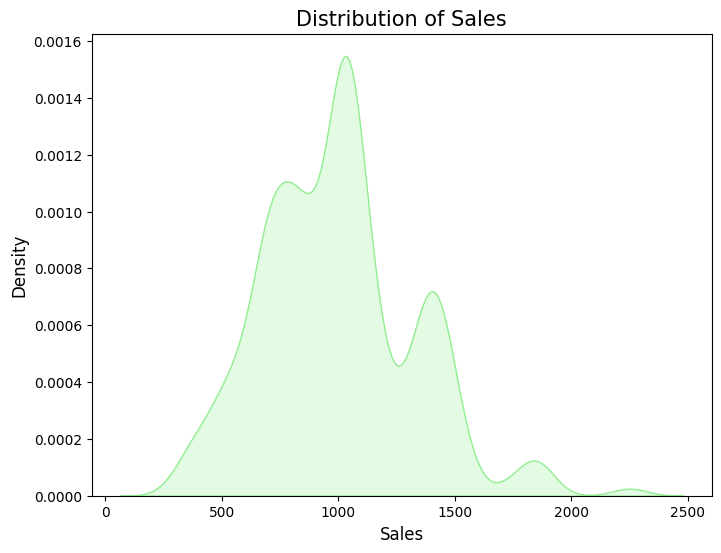

In [155]:
# Create the KDE plot
plt.figure(figsize=(8, 6))
sns.kdeplot(x='sales', data=pet, color='lightgreen', shade=True)

# Customize the plot
plt.title('Distribution of Sales', fontsize=15)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

## Distribution of sales by category

From the multiple boxplots below, we can see the price range in food,medicine and even toys is more significant than other categoires. The majority of the prices range from 800 to 1150 dollars, which is higher than housing and equipment. From accesory we can say that most of the prices go from 500 to 1500 dollars. I am not sure of the meaning of the category in ‘Unknown’ so I cannot conclude anything about that type until I have further information.

We can observe that the most expensive categories are food and toys, more or less in the same range, meanwhile medicine is a bit lower although they it does share some range as well.

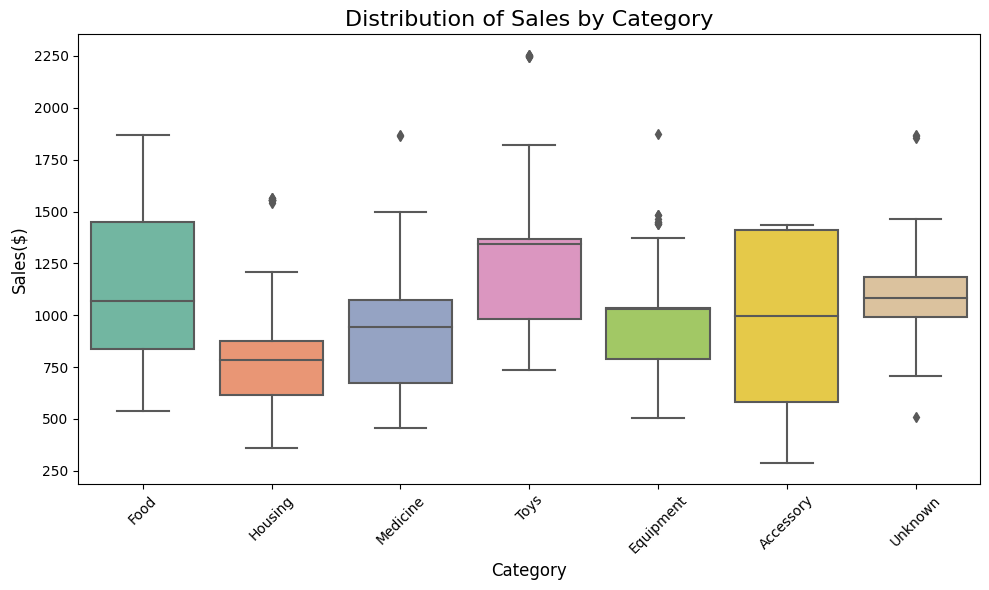

In [156]:
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(x='category', y='sales', data=pet, palette='Set2')

# Customize the plot
plt.title('Distribution of Sales by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Sales($)', fontsize=12)

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()       # Ensure the plot layout is tight
plt.show()

##  Relationship between repeat purchases and sales

In the following visualization, we explore the impact of repeat purchases on sales within our dataset. The bar plot below illustrates the average sales for two distinct categories: customers who have made repeat purchases (True) and those who have not (False). This analysis allows us to discern whether repeat customers tend to generate higher or lower average sale value. 

Customers who make repeat purchases tend to have slightly lower average sales value. This suggests that customer loyalty and repeat business may contribute positively to sales performance.

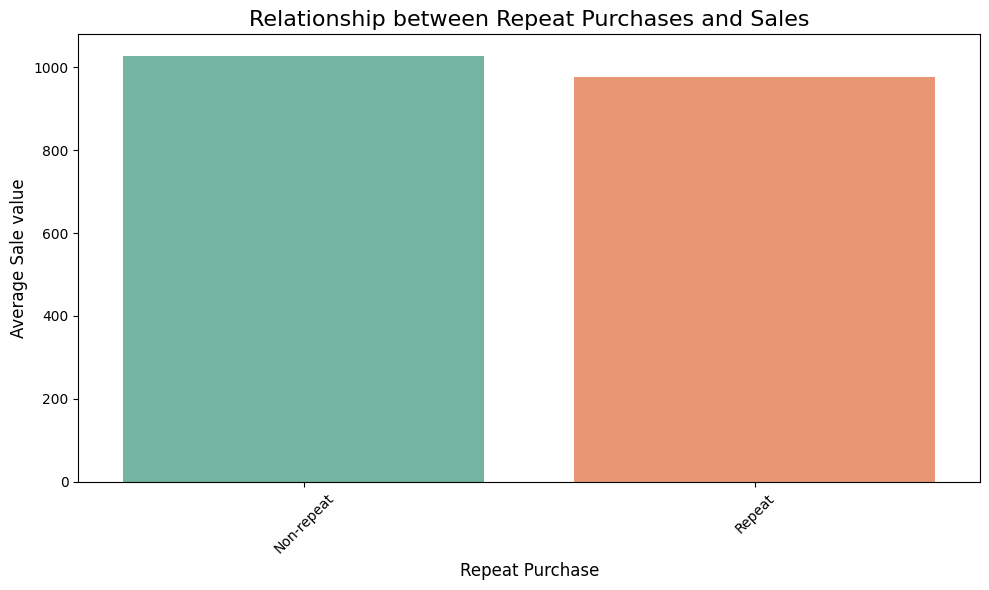

In [157]:
# Group the data by 'repeat purchase' and calculate the mean sales for each group
sales_by_repeat_purchase = pet.groupby('repeat_purchase')['sales'].mean().reset_index()

# Customize the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x='repeat_purchase', y='sales', data=sales_by_repeat_purchase, palette='Set2')

# Customize the plot
plt.title('Relationship between Repeat Purchases and Sales', fontsize=16)
plt.xlabel('Repeat Purchase', fontsize=12)
plt.ylabel('Average Sale value', fontsize=12)

# Show the plot
plt.xticks([0,1],['Non-repeat','Repeat'],rotation=45)  
plt.tight_layout()
plt.show()


In the barplot below we may see that although the average sale value may be similar, we can conclude that repeat purchases make up a higher percentage of total sales value. This is because as we saw in the first graph of our analysis, most of the transactions are repeat purchases,and this quantity effect offsets the average sales value effect we saw previously.



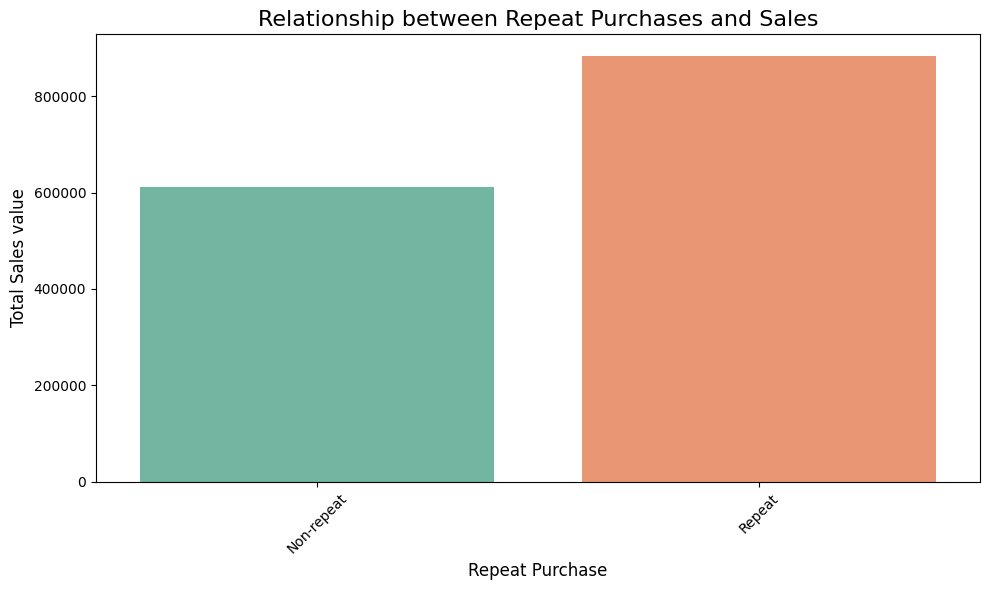

In [158]:
sales_by_repeat_purchase = pet.groupby('repeat_purchase')['sales'].sum().reset_index()

# Customize the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x='repeat_purchase', y='sales', data=sales_by_repeat_purchase, palette='Set2')

# Customize the plot
plt.title('Relationship between Repeat Purchases and Sales', fontsize=16)
plt.xlabel('Repeat Purchase', fontsize=12)
plt.ylabel('Total Sales value', fontsize=12)

# Show the plot
plt.xticks([0,1],['Non-repeat','Repeat'],rotation=45)  
plt.tight_layout()
plt.show()


Lastly, in the boxplot below we get to see the way the distribution of sales by category depending on if it is a repeat purchase graph behaves. From the data we can conclude that there is room for improvement in the medicine market, specially in the non-repeat purchases.

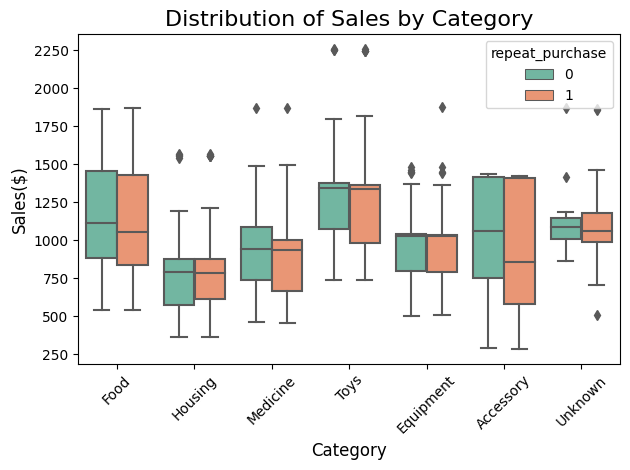

In [159]:
sns.boxplot(x='category', y='sales', data=pet, palette='Set2',hue='repeat_purchase')

# Customize the plot
plt.title('Distribution of Sales by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Sales($)', fontsize=12)

# Show the plot
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout()       # Ensure the plot layout is tight
plt.show()


## Business metrics


Since our goal is to increase the number of sales of the products next year, I would recommend we use the percentage of repeat pruchases as our metric.

Based on our last year data, 60% of the products sold are repeated pruchases. Therefore, if this number increases in the next year, it indicates very good sign to achieve our goal.

## Recommendation


After analyzing our sales data, it's evident that encouraging repeat purchases can significantly impact our sales performance. Customers who engage in repeat purchases demonstrate higher average sales, indicating the potential for increased revenue and improved business sustainability. To leverage this opportunity, we recommend implementing stategies such as loyalty programms, personalized marketing and retention campaigns to encourage clients to buy time to time the same products

By implementing these strategies and prioritizing repeat customer engagement, we can not only increase our sales revenue but also build a loyal customer base that can serve as brand advocates.So, as a result I would highly recommend to take this piece of advice into consideration since it aligns with our long-term goals of sustainable growth and customer-centric business practices.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam